In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Path of folder
file_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_23/'

data = pd.read_csv(file_path)

data.head(10)

# Get list of all CSV files in the folder
#csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
#dfs = []

# Loop through the CSV files and read each one into a dataframe
#for file in csv_files:
    #df = pd.read_csv(file)
    #dfs.append(df)

# Concatenate all dataframes into a single dataframe
#data = pd.concat(dfs, ignore_index=True)

Mounted at /content/drive


,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type
0,2024-07-24 03:00:06,MC1_Thambuttegama-AN0011-BDGHP,Major,BBU CPRI Interface Error,26234,"Cabinet No.=0, Subrack No.=0, Slot No.=2, Port...",Thambuttegama,2024-07-24 03:11:49,2024-07-23 10:41:12,Cleared,TT-20240723-00000703,AN0011,HUAWEI,Access,GBTS
1,2024-07-23 23:11:45,MC2_Wilwatta_Tunnel-GM0990-BGHP,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=71, Slot No.=0, TX ...",Wilwatta_Tunnel_Lamp,2024-07-24 07:31:46,2024-07-23 23:11:45,Cleared,TT-20240521-00000173,GM0990,HUAWEI,Access,GBTS
2,2024-07-23 21:55:46,Karavitagara-PU0063-BDGHOP,Minor,Transmission Optical Interface Error,26222,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Port...",Karavitagara,2024-07-23 21:57:47,2024-07-23 19:40:42,Cleared,TT-20240713-00000070,PU0063,HUAWEI,Access,GBTS
3,2024-07-23 21:30:16,MC2_Chilaw_Sudu_Wella-PU0193-BDGHOP,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=61, Slot No.=0, TX ...",Chilaw_Sudu_Wella,2024-07-24 07:14:16,2024-07-23 21:30:16,Cleared,TT-20240528-00000107,PU0193,HUAWEI,Access,GBTS
4,2024-07-23 21:05:06,Kahaduwa_Town-GA0213-L,Critical,GNSS Locked Satellites Insufficient,26126,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Boar...",Kahaduwa_Town,2024-07-24 08:18:07,2024-07-23 21:05:06,Cleared,TT-20240409-00000563,GA0213,HUAWEI,Access,eNodeB
5,2024-07-23 20:21:12,Karavitagara-PU0063-BDGHOP,Minor,Transmission Optical Interface Error,26222,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Port...",Karavitagara,2024-07-23 21:52:05,2024-07-23 20:21:12,Cleared,TT-20240713-00000070,PU0063,HUAWEI,Access,GBTS
6,2024-07-23 20:04:02,Mabima-GM0170-L,Minor,Board Temperature Unacceptable,26104,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Boar...",Mabima,2024-07-23 23:15:46,2024-07-23 20:04:02,Cleared,TT-20240723-00000277,GM0170,HUAWEI,Access,eNodeB
7,2024-07-23 18:58:52,Ruwanpura-AN0186-BHP,Critical,Cell RX Channel Interference Noise Power Unbal...,29250,"eNodeB Function Name=Ruwanpura-AN0186-BHP, Loc...",Ruwanpura,2024-07-24 03:18:02,2024-07-23 07:18:02,Cleared,TT-20240717-00001262,AN0186,HUAWEI,Access,eNodeB
8,2024-07-23 18:41:14,MC1_Maradana_Station-CM1360-BHOP,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=66, Slot No.=0, TX ...",Maradana_Station,2024-07-24 10:39:14,2024-07-23 18:41:14,Cleared,TT-20240717-00000521,CM1360,HUAWEI,Access,eNodeB
9,2024-07-23 18:41:13,Maradana_Station-CM1360-DG,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=66, Slot No.=0, TX ...",Maradana_Station,2024-07-24 10:39:13,2024-07-23 18:41:13,Cleared,TT-20240717-00000521,CM1360,HUAWEI,Access,eGBTS


In [3]:
data.shape

(2972, 15)

In [4]:
# Sort by 'First Occurred On' in descending order (latest alarms first)
data = data.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime
data['First Occurred On'] = pd.to_datetime(data['First Occurred On'])

# Reference time
reference_time = pd.to_datetime('2024-07-24 10:00:00')

# Calculate the relative hour index
data['Relative Hour Index'] = ((data['First Occurred On'] - reference_time).dt.total_seconds() // 3600).astype(int)

# Adjust the index to set the 08:00 to 09:00 hour as 0 then the prevo=ious hours as index -1,-2,-3, ...
data['Relative Hour Index'] = data['Relative Hour Index'].apply(lambda x: x if x < 0 else x)


# Print the updated dataframe
data.head(50000)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type,Relative Hour Index
2760,2024-07-24 10:02:02,Karativu_Puttalam-PU0117-BHP,Major,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=60, Slot No.=0, TX ...",Karativu_Puttalam,2024-07-24 10:50:39,2024-07-24 10:02:00,Cleared,TT-20240724-00000169,PU0117,HUAWEI,Access,eNodeB,0
2761,2024-07-24 10:00:02,Karativu_Puttalam-PU0117-BHP,Major,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=60, Slot No.=0, TX ...",Karativu_Puttalam,2024-07-24 10:50:39,2024-07-24 10:00:00,Cleared,TT-20240724-00000169,PU0117,HUAWEI,Access,eNodeB,0
2766,2024-07-24 08:33:29,Kaleliya-GM0175-L,Minor,Board Temperature Unacceptable,26104,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Boar...",Kaleliya,NaN,2024-07-24 08:33:29,Uncleared,TT-20240724-00000182,GM0175,HUAWEI,Access,eNodeB,-2
2770,2024-07-24 07:50:07,Military_Hospitl_Ind-CM1304-J,Major,RF Unit Hardware Fault,26532,"Cabinet No.=0, Subrack No.=66, Slot No.=0, Boa...",Military_Hospitl_Ind,2024-07-24 10:05:48,2024-07-24 07:50:07,Cleared,TT-20240723-00000509,CM1304,HUAWEI,Access,eGBTS,-3
2771,2024-07-24 06:55:54,Koswadiya-PU0031-DG,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",Koswadiya,NaN,2024-07-24 06:55:54,Uncleared,TT-20240722-00000213,PU0031,HUAWEI,Access,eGBTS,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,2024-06-26 12:31:12,Kahanthota_Rd_Lamp-CM5519-DHP,Major,BBU Fan Stalled,26110,"Cabinet No.=0, Subrack No.=0, Slot No.=17, Boa...",Kahanthota_Rd_Lamp,2024-07-02 16:35:23,2024-06-26 12:31:12,Cleared,TT-20240525-00000770,CM5519,HUAWEI,Access,GBTS,-670
2752,2024-06-26 12:22:10,Karainagar_SLT-JA0085-BHOP,Critical,GNSS Antenna Fault,26125,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Boar...",Karainagar_SLT,2024-06-26 16:44:23,2024-06-26 12:22:10,Cleared,TT-20240626-00000383,JA0085,HUAWEI,Access,eNodeB,-670
2753,2024-06-26 12:21:15,Orugodawatta-CM0159-BDGHOPT,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",Orugodawatta,2024-06-26 18:16:35,2024-06-26 12:21:15,Cleared,TT-20240622-00000400,CM0159,HUAWEI,Access,GBTS,-670
2754,2024-06-26 11:49:30,Jayasumanarama_RD_South-CM0999-BHOPT,Critical,Cell RX Channel Interference Noise Power Unbal...,29250,eNodeB Function Name=Jayasumanarama_RD_South-C...,Jayasumanarama_South_Reloc,2024-06-26 12:56:10,2024-06-26 11:49:30,Cleared,TT-20240625-00000591,CM0999,HUAWEI,Access,eNodeB,-671


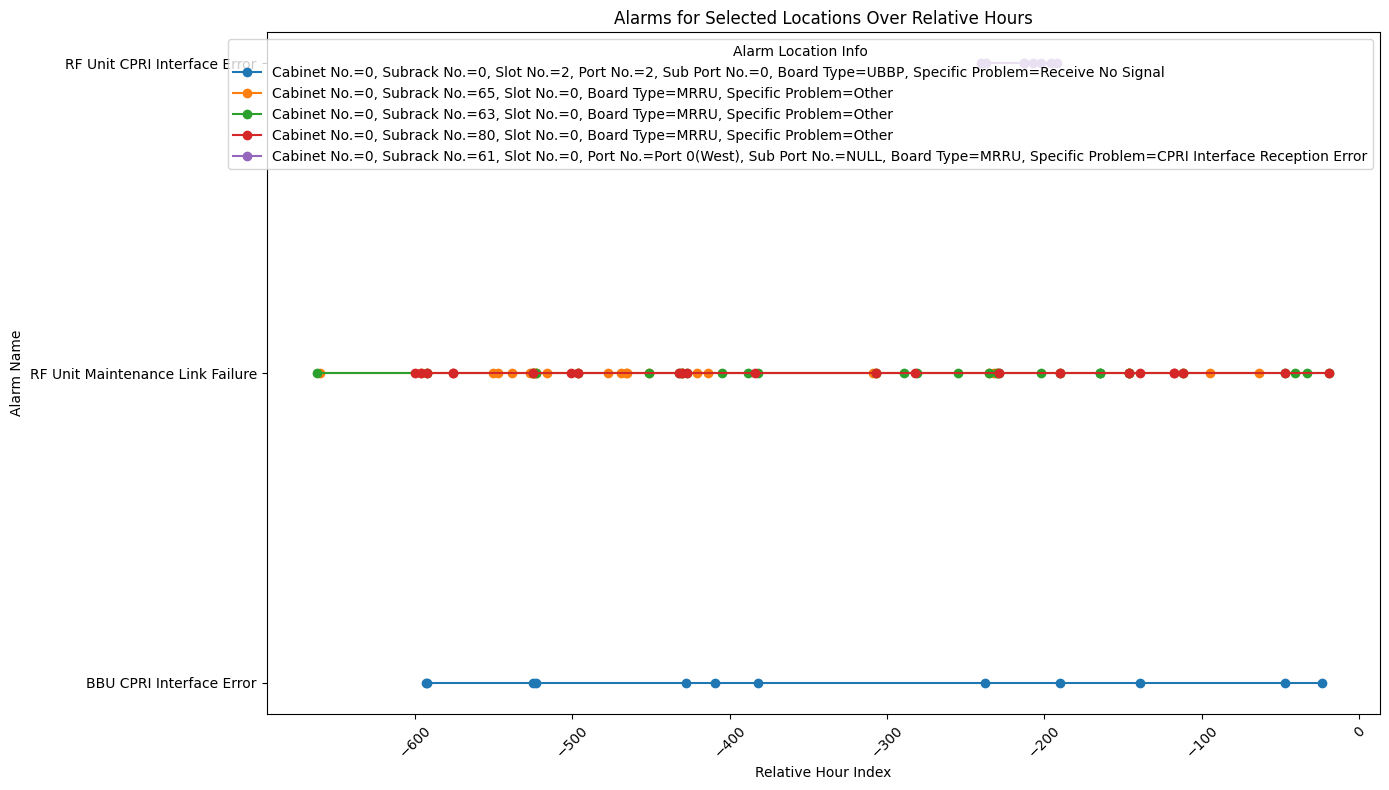

In [5]:


# Define the 5 specific Alarm Location Info values
selected_locations = ['Cabinet No.=0, Subrack No.=0, Slot No.=2, Port No.=2, Sub Port No.=0, Board Type=UBBP, Specific Problem=Receive No Signal',
                      'Cabinet No.=0, Subrack No.=65, Slot No.=0, Board Type=MRRU, Specific Problem=Other',
                      'Cabinet No.=0, Subrack No.=63, Slot No.=0, Board Type=MRRU, Specific Problem=Other',
                      'Cabinet No.=0, Subrack No.=80, Slot No.=0, Board Type=MRRU, Specific Problem=Other',
                      'Cabinet No.=0, Subrack No.=61, Slot No.=0, Port No.=Port 0(West), Sub Port No.=NULL, Board Type=MRRU, Specific Problem=CPRI Interface Reception Error']


# Filter data for these locations
filtered_data = data[data['Alarm Location Info'].isin(selected_locations)]

# Plotting
plt.figure(figsize=(14, 8))

for location in selected_locations:
    location_data = filtered_data[filtered_data['Alarm Location Info'] == location]
    plt.plot(location_data['Relative Hour Index'],
             location_data['Alarm Name'],
             marker='o',
             linestyle='-',
             label=location)

plt.title('Alarms for Selected Locations Over Relative Hours')
plt.xlabel('Relative Hour Index')
plt.ylabel('Alarm Name')
plt.legend(title='Alarm Location Info')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

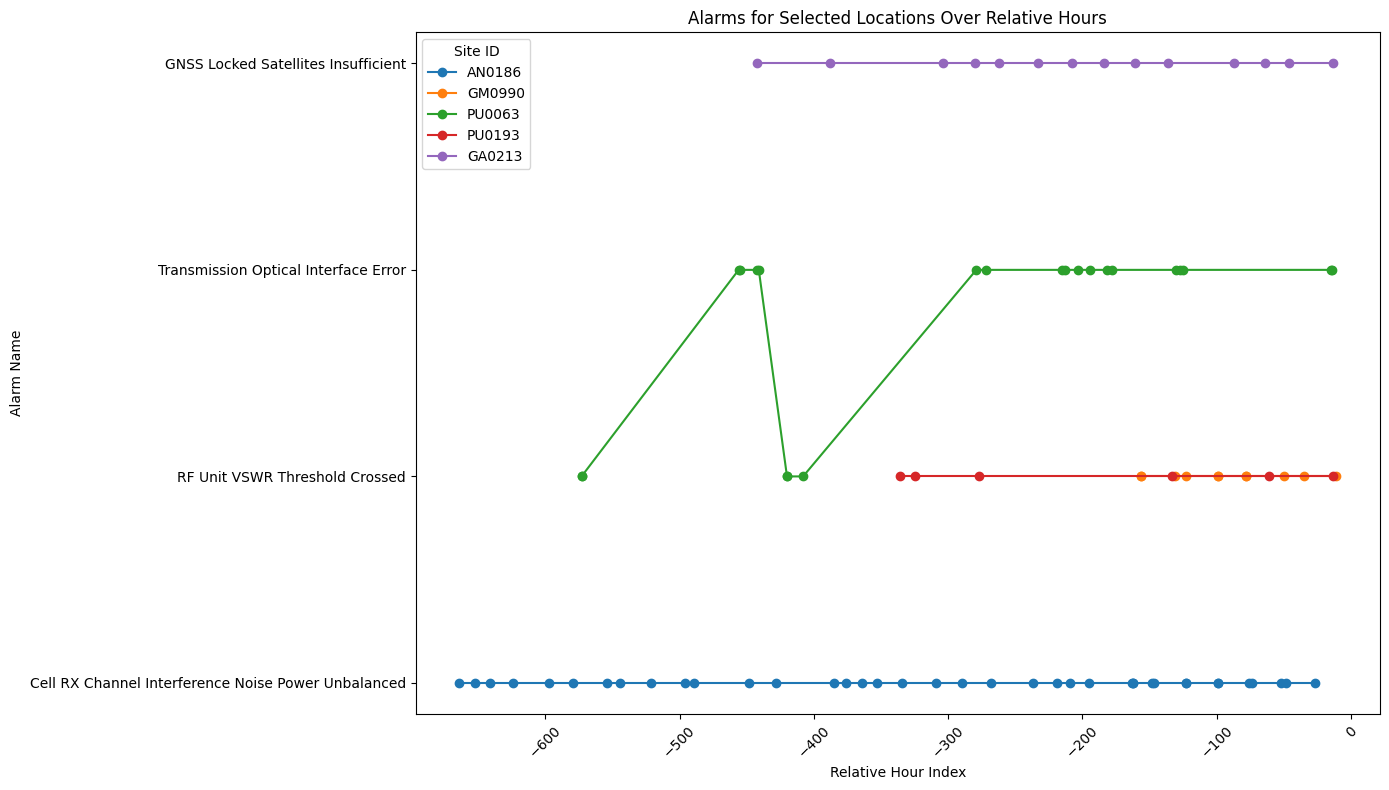

In [6]:


# Define the 5 specific Alarm Location Info values
selected_locations = ['AN0186',
                      'GM0990',
                      'PU0063',
                      'PU0193',
                      'GA0213']


# Filter data for these locations
filtered_data = data[data['Site ID'].isin(selected_locations)]

# Plotting
plt.figure(figsize=(14, 8))

for location in selected_locations:
    location_data = filtered_data[filtered_data['Site ID'] == location]
    plt.plot(location_data['Relative Hour Index'],
             location_data['Alarm Name'],
             marker='o',
             linestyle='-',
             label=location)

plt.title('Alarms for Selected Locations Over Relative Hours')
plt.xlabel('Relative Hour Index')
plt.ylabel('Alarm Name')
plt.legend(title='Site ID')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [7]:


# Retain only the specified columns
columns_to_keep = ['Site ID','Alarm Name', 'Vendor', 'Domain', 'Device Type','Alarm Location Info','Relative Hour Index']
filtered_data = filtered_data[columns_to_keep]


filtered_data.dropna()


# Print the updated dataframe
filtered_data.head()

# Print the updated dataframe
filtered_data.head(100)

,Site ID,Alarm Name,Vendor,Domain,Device Type,Alarm Location Info,Relative Hour Index
1,GM0990,RF Unit VSWR Threshold Crossed,HUAWEI,Access,GBTS,"Cabinet No.=0, Subrack No.=71, Slot No.=0, TX ...",-11
3,PU0193,RF Unit VSWR Threshold Crossed,HUAWEI,Access,GBTS,"Cabinet No.=0, Subrack No.=61, Slot No.=0, TX ...",-13
4,GA0213,GNSS Locked Satellites Insufficient,HUAWEI,Access,eNodeB,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Boar...",-13
5,PU0063,Transmission Optical Interface Error,HUAWEI,Access,GBTS,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Port...",-14
2,PU0063,Transmission Optical Interface Error,HUAWEI,Access,GBTS,"Cabinet No.=0, Subrack No.=0, Slot No.=7, Port...",-15
...,...,...,...,...,...,...,...
2557,AN0186,Cell RX Channel Interference Noise Power Unbal...,HUAWEI,Access,eNodeB,"eNodeB Function Name=Ruwanpura-AN0186-BHP, Loc...",-597
2620,AN0186,Cell RX Channel Interference Noise Power Unbal...,HUAWEI,Access,eNodeB,"eNodeB Function Name=Ruwanpura-AN0186-BHP, Loc...",-624
2662,AN0186,Cell RX Channel Interference Noise Power Unbal...,HUAWEI,Access,eNodeB,"eNodeB Function Name=Ruwanpura-AN0186-BHP, Loc...",-641
2695,AN0186,Cell RX Channel Interference Noise Power Unbal...,HUAWEI,Access,eNodeB,"eNodeB Function Name=Ruwanpura-AN0186-BHP, Loc...",-652
